<a href="https://colab.research.google.com/github/kntb0107/odl_tutorials/blob/main/main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TITLE**: Utilizing Deep Learning Techniques to Determine Factors Influencing the Likability of the Songs Present within a Spotify Dataset

# **INITALIZATION**

In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

import warnings
warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#NISHAT DATA LOAD
df = pd.read_csv('/content/drive/MyDrive/data/data.csv')

# **1. DATA UNDERSTANDING** 

Before creating visualisations to explain the data, it is important to familiarise oneself with the background of the data itself, and understand how many NULLs, Duplicates and Missing values there are within the dataset whilst understanding the descriptive statistics and value types.

This can aid in creating meaningful visualisations within the EDA process, and hence aid in the selection of the features later on.

In [ ]:
#TOTAL ROWS AND COLUMNS
n_songs, n_attributes = df.shape
print('Total Songs: ',n_songs)
print('Total Attributes: ',n_attributes)

Total Songs:  2017
Total Attributes:  17




> There are in total of 2017 rows within the Spotify dataset, and since it has more than 1k rows, it is deemed **suitable** for our deep learning project, since it was advised to have a minimum of 1k+ records. Since there are 17 columns within this dataset, it is necessary to conduct a more through research on its contents and data types in order to aid with the feature selection process.







In [ ]:
#DATATYPES OF THE VARIABLES PRESENT
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 




> Within this dataset, there are more numerical variables than string variables, as observed with 10 float variables, and 5 int variable. This means that we can study the correlation of these numerical variables against each the target variable, and study the dataset and its relationships further.





> Column named **Unnamed: 0** needs to be taken a deeper look due to its ambigious nature.



In [ ]:
#DISPLAY TOP 5 ROWS FROM DATASET
df.head(5) 

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## **Data/Column Description**


> Looking into the columns more in depth can aid us in understanding the dataset further. Looking more into the resources provided by the author of the dataset can further aid in this understanding. Below is the in-depth description of the columns.





1.   **Unnamed: 0** : Column labeling the rows from a chronological order. 
2.   **acousticness** : Column having values from 0.0 to 1.0  indicating whether or not the track is acoustic. *The number 1.0 denotes a high level of certainty that the track is acoustic.*
3.   **danceability** : Column referring to how ideal a track is for dancing based on a number of factors such as pace, rhythm stability, beat strength, and general regularity. *In this dataset, the least danceable value is 0.0, while the most danceable value is 1.0.*
4.   **duration_ms** : Column displaying the track's duration in milliseconds.
5.   **energy** : A subjective measure of intensity and activity that ranges from 0.0 to 1.0. Dynamic range, perceived loudness, timbre, onset rate, and general entropy are all perceptual characteristics that contribute to this property. According to the author of the dataset , a typical energetic songs have a rapid, loud, and boisterous vibe to them. Some examples given by the author is death metal having a high energy level, coming at 1.0, while a chill song such as lofi tunes would score a low energy form, nearing the 0s. 
6.   **instrumentalness** : Determines whether a track has no vocal tracks. The author has considered  the noises "ooh" and "aah" to be instrumental, and only explicit tracks containing spoken words e.g rap is considered to be a vocal track and not an instrumental one. *The closer the instrumental-ness number gets to 1.0, the more likely the track is devoid of vocals. Instrumental recordings are represented by values over 0.5, but as the value approaches 1.0, confidence increases.*  
7.   **key** : Depiction of the track's key. Pitch Class notation is used to translate integers to pitches. Example given by author: E.g. 0 = C, 1 = C♯/D♭, 2 = D etc.
8.   **liveness** : Depicts the existence of an audience within the track. A higher liveness score indicates that the track was most likely performed live. *If the number is more than 0.8, the music is almost certainly live.*
9.   **loudness** : The loudness of the songs is depicting in this column in decibles (dB). Author mentions that this loudness is averaged accoss the track, and mentions that it can be used to compare the loudness acorss the different tracks. It was chosen due to it being the "main psychological correlation of physical strength", also known as amplitude.* The column ranges -60 to 0 dB.*
10.  **mode** : The sort of scale from which a track's melodic material is generated is indicated by the track's modality (major or minor). *The number 1 represents the major, whereas the number 0 represents the minor.*
11.  **speechiness** : Depicts the presence of spoken words within track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. The author has given some additional insights, mentioning that values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
12.  **tempo** : Column depicting the estimated pace of the track in beats per minute (BPM). Author has defined tempo, or the speed or pace of a composition, to be determined by the average beat duration in musical terms.
13.  **time_signature** : A track's projected total time signature. The time signature (meter) has been defined to be a musical notation that specifies the number of beats in each bar (or measure).
14.  **valence** : Column depicting a scale ranging from 0.0 to 1.0 that describes a track's musical positivity. Tracks with a high valence sound more positive, whereas tracks with a low valence sound more negative.
15.  **target** : Column depicting the target variable and explaining the likeability of the track. "1" is songs liked, and "0" is the songs disliked.
16.  **song_title** : Column depicting the song title of the tracks
17.  **artist** : Column depicting the song's artist of the tracks

[**Source**](https://opendatascience.com/a-machine-learning-deep-dive-into-my-spotify-data/)



> From the data understanding, the first column can be seen as an anomaly here **[Unnamed: 0]**, since it does not provide any viable information for either the EDA process, or the model building process. Hence, it will be dropped. 



In [ ]:
#DROP [ UNNAMED: 0 ] FROM THE DATASET
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
#CHECK THE UPDATED DATASET
n_songs, n_attributes = df.shape
print('Total Songs: ',n_songs)
print('[UPDATED] Total Attributes: ',n_attributes)

Total Songs:  2017
[UPDATED] Total Attributes:  16


## **Checking for NULL & Duplicate values**


NULL values, if found, should be handled since this can decrease the predictive capability of the classifiers. 

>According to .info() there was no NULL values present, however we can double-confirm it below.

**Link:**
https://www.freecodecamp.org/news/the-penalty-of-missing-values-in-data-science-91b756f95a32/

In [ ]:
#DISPLAYS HOW MANY NULL VALUES THERE ARE WITHIN DATASET
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64



> It has been confirmed that there are no missing values within this dataset, and thus implementation of any kind will not take place. 



Duplicate values are removed since they can cause overfitting and skew the results. Hence, it is important to see how many duplicate values there are within this dataset. 

>This will be studied in two parts: (1) duplicates considering all of the columns and (2) duplicates considering song_title column, grouped by artist column. 



In [ ]:
#DISPLAYS BOTH OF THE DUPLICATED VALUES
df[df.duplicated(keep=False)]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
148,0.096200,0.654,252095,0.292,0.003100,2,0.106,-12.977,1,0.4740,153.547,4.0,0.111,1,River,Ibeyi
172,0.024600,0.586,374133,0.806,0.000167,1,0.353,-9.542,1,0.0548,110.325,4.0,0.207,1,Her Fantasy,Matthew Dear
267,0.096200,0.654,252095,0.292,0.003100,2,0.106,-12.977,1,0.4740,153.547,4.0,0.111,1,River,Ibeyi
480,0.036900,0.448,258653,0.733,0.042500,3,0.169,-6.238,1,0.0292,142.008,4.0,0.404,1,Myth,Beach House
508,0.024600,0.586,374133,0.806,0.000167,1,0.353,-9.542,1,0.0548,110.325,4.0,0.207,1,Her Fantasy,Matthew Dear
714,0.000334,0.907,183581,0.616,0.425000,6,0.110,-7.073,0,0.0577,124.036,4.0,0.614,1,Jack,Breach
854,0.934000,0.440,254360,0.433,0.811000,2,0.273,-17.453,0,0.0412,79.952,4.0,0.217,1,Episode I - Duel of The Fates,John Williams
894,0.000334,0.907,183581,0.616,0.425000,6,0.110,-7.073,0,0.0577,124.036,4.0,0.614,1,Jack,Breach
927,0.934000,0.440,254360,0.433,0.811000,2,0.273,-17.453,0,0.0412,79.952,4.0,0.217,1,Episode I - Duel of The Fates,John Williams
981,0.036900,0.448,258653,0.733,0.042500,3,0.169,-6.238,1,0.0292,142.008,4.0,0.404,1,Myth,Beach House





> There are 5 rows which were duplicated in relation to the entire columns, and hence, the other 5 duplicated rows needs to be dropped accordingly. 







In [ ]:
to_drop = df[df.duplicated(keep='first')]

In [ ]:
#ENTER THE DROPPING CODE HERE
df = df.drop_duplicates()
print("DROPPED DUPLICATES: \n", to_drop)

DROPPED DUPLICATES: 
      acousticness  danceability  duration_ms  energy  instrumentalness  key  \
267      0.096200         0.654       252095   0.292          0.003100    2   
508      0.024600         0.586       374133   0.806          0.000167    1   
894      0.000334         0.907       183581   0.616          0.425000    6   
927      0.934000         0.440       254360   0.433          0.811000    2   
981      0.036900         0.448       258653   0.733          0.042500    3   

     liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
267     0.106   -12.977     1       0.4740  153.547             4.0    0.111   
508     0.353    -9.542     1       0.0548  110.325             4.0    0.207   
894     0.110    -7.073     0       0.0577  124.036             4.0    0.614   
927     0.273   -17.453     0       0.0412   79.952             4.0    0.217   
981     0.169    -6.238     1       0.0292  142.008             4.0    0.404   

     target           



> ***Running the code below, we can observe whether there are songs of the same title and artist.*** 



In [ ]:
#SAME SONGS WITH SAME ARTIST
df.groupby('artist')['song_title'].value_counts().sort_values(ascending=False).loc[lambda x : x>1].to_frame()

,,song_title
artist,song_title,
Hanson,MMMBop,2
A$AP Ferg,Shabba,2
Justice,Civilization,2
Leon Bridges,Coming Home,2
Logic,1-800-273-8255,2
Daft Punk,Get Lucky,2
Luis Fonsi,Despacito - Remix,2
Radiohead,The Daily Mail,2
M83,Midnight City,2



In normal cases this would be removed as well, since it would skew our understanding of the data due to conflicting informations. However, in terms of music, there are some songs which might have the same title and artist, but different arrangements and hence, released as a different version. Due to this reason, the song might be the same, but due to its arrangements it can count as a different experience overall. 

>***Due to this, these rows would not be removed***.

***Links***: 
1. https://rateyourmusic.com/discussion/music/artists-whove-released-two-or-more-versions-of-the-same-song/1/

2. https://theafterword.co.uk/the-same-song-done-more-than-once-by-the-same-artist/






## **Checking the Unique Values**

In [ ]:
#CHECKING THE OVERALL UNIQUE VALUES WITHIN DATASET
dict = {}
for i in list(df.columns):
    dict[i]=df[i].value_counts().shape[0]
pd.DataFrame(dict,index=['unique values']).T

,unique values
acousticness,1394
danceability,632
duration_ms,1921
energy,719
instrumentalness,1107
key,12
liveness,793
loudness,1808
mode,2
speechiness,792




>**DERIVED FROM THE UNIQUE VALUES**



*   There are in total of 1343 unique artists within this dataset.
*   Out of which, 1956 are considered to be unique instances of the songs. It is to be noted that there can be the same song title but sung by different artists, and thus we should not assume that there are 1956 unique SONG TRACKS in this dataset, but merely which of the song titles are not repeated.
*   The target is 2, confirming to us that it is a Binary variable.
*   This dataset records to be 12 keys.

## **Descriptive Statistics**

In [ ]:
#DATASET SUMMARY
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2012.000000,2012.000000,2.012000e+03,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,0.187513,0.618450,2.462608e+05,0.681840,0.132980,5.348907,0.190816,-7.076750,0.612326,0.092568,121.602351,3.968191,0.497278,0.504473
std,0.259691,0.161003,8.202146e+04,0.210255,0.272967,3.649559,0.155571,3.756502,0.487341,0.089615,26.687988,0.256166,0.247167,0.500104
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009590,0.514000,2.000045e+05,0.563750,0.000000,2.000000,0.092200,-8.392250,0.000000,0.037500,100.164000,4.000000,0.296000,0.000000
50%,0.063500,0.631000,2.291200e+05,0.715500,0.000074,6.000000,0.126500,-6.247500,1.000000,0.054900,121.407000,4.000000,0.493000,1.000000
75%,0.265000,0.738000,2.703565e+05,0.846000,0.053925,9.000000,0.246250,-4.744000,1.000000,0.108000,137.695250,4.000000,0.692000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000




1.   instrumentals within the tracks happen to be low (mean = 0.13)  however, looking at the speechiness, it is certain that most of the tracks present contains music, considering the mean being 0.09, indicating low levels of speechiness. 
2.   tracks within dataset happen to not be acoustic on average
3. the songs can be used for dancing, since the average rate of danceability happen to be 0.6.
5. the mean key of the dataset = 5
6. most of the song present are studio-based and are not live 
7.  the tempo for most songs average to be 121 BPM, which is the average BPM for most hit songs written [x](https://www.masterclass.com/articles/music-101-what-is-tempo-how-is-tempo-used-in-music#how-is-tempo-used-in-music)





# **2. EXPLORATORY DATA ANALYSIS (EDA)**

After the data's makeup was understood in the previous section, we can now make meaningful visualisations to further understand the background of the data itself. This can also aid us in understanding which features are most correlated to the target variable, and choose the necessary input variables.


## **Check Balanced-Imbalanced Dataset**

1. Check the distribution of target label
2. Check the proportion of target label and visualize it in pie chart

In [ ]:
#Target Label Distribution
print('Target Label Distribution \n', df['target'].value_counts())

Target Label Distribution 
 1    1015
0     997
Name: target, dtype: int64


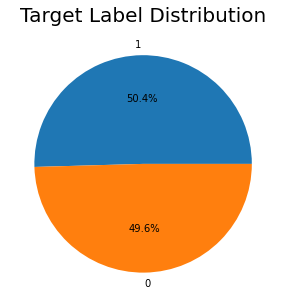

In [ ]:
plt.figure(figsize=(5,5))
label = df['target'].value_counts()
plt.pie(label.values, labels=label.index, autopct= '%1.1f%%')
plt.title('Target Label Distribution', fontsize=20)
plt.show()

It is important to check the balance of target variable in order to have the good accuracy of the model. If the target variable is imbalanced then the model will get overfitted or underfitted. 

>In this dataset, the target variable is balanced, as we can see that the data with 0 value filled up 49.6% of the dataset, while 1 value filled up 50.4% of the dataset. 

## **Check distribution and outliers**

In this visualization part we use histogram to illustrate the data distribution.

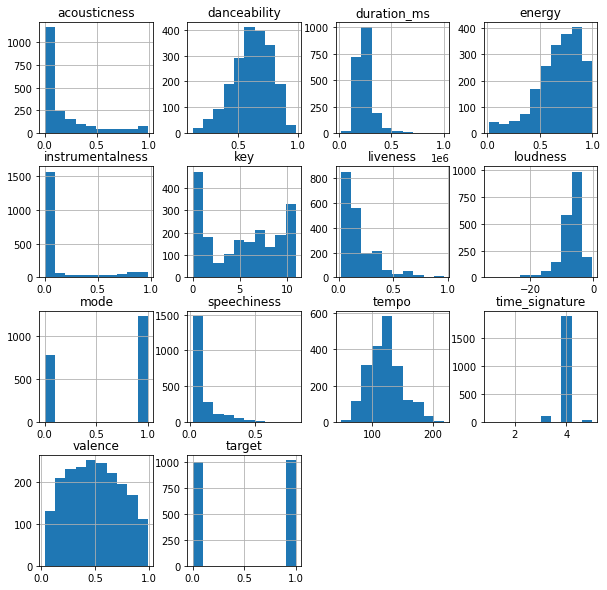

In [ ]:
p = df.hist(figsize = (10,10))

>As we can see that most of the variable is getting skewed and not normally distributed. For example, accousticness and duration_ms is right skewed, while energy and loudness is left skewed.

We need to fix the skewness. As a result, with skewed data, the tail region may act as an outlier for the statistical model, and we know that outliers have a negative impact on model performance, particularly in regression-based models. There are statistical models that are resistant to outliers, such as Tree-based models, but this limits the number of models that may be tried. 

**Check Outliers**


*   If we check the outlier data by column, we can see more clearly that many columns have extreme outlier levels. 
*   but if we check for all columns we can only see the range for the data outlier distance in the duration_ms column, this is because the range in that column reaches hundreds of thousands of numbers. so in other columns that only have a range of decimal numbers even hundreds are not visible.
*   after checking, many columns have extreme outliers, namely acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo columns.
*  Because of the extreme and large number of outliers, we are not advised to delete it because an outlier observation is very likely to affect the data held. If the deletion or omission of outlier data is still enforced, it will significantly change the statistical equation and its conclusions.

https://salsabilabasalamah.medium.com/cara-mengidentifikasi-dan-penanganan-data-outlier-d2fe16c6d62c





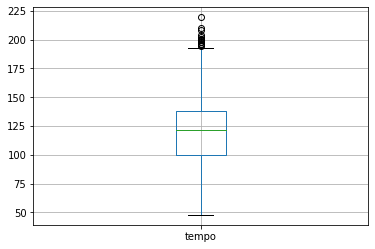

In [ ]:
#check outliers overall
#p = df_update.boxplot(figsize=(15,15))

#Check per-feature
df.boxplot(column='tempo')

In [ ]:
# Classifying data into numerical and categorical variables.
data_numerical=df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]
data_categorical=df[['key','mode','time_signature','target']]

**Skewness and kurtosis**
*   If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.
*   Kurtosis is a statistical measure, whether the data is heavy-tailed or light-tailed in a normal distribution

**Observation**

>acousticness, durations_ms, instrumentalness, liveness, loudness, energy and speechiness are extremely skewed.

https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de


In [ ]:
# Skewness and kurtosis
s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,acousticness,1.657753,1.747025
1,danceability,-0.422987,-0.204968
2,duration_ms,2.501598,11.913144
3,energy,-0.915369,0.580390
4,instrumentalness,1.957088,2.278537
5,liveness,1.953186,4.092548
6,loudness,-2.235925,7.985262
7,speechiness,2.305167,6.261436
8,tempo,0.440990,0.043986
9,valence,0.076381,-1.010055


##**Checking the correlation between attributes**



**Label Encoding**

Before transforming and splitting data, it is necessary to categorize the data. This is necessary because machine learning models can only process numerical data. in the dataset we have 2 columns that have categorical data types, namely song_title and artist. so in these 2 columns we have to convert them to numerical data. Data is changed using Encoding Label.


1. https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
2. https://medium.com/warung-pintar/beberapa-cara-untuk-preprocessing-data-dalam-machine-learning-13cef4294614
3. https://medium.com/@adiptamartulandi/data-preprocessing-pada-machine-learning-handling-categorical-data-ucupstory-6e409dbfd0a0

In [ ]:
#Label Encoding
pd.options.mode.chained_assignment = None  # default='warn'
cols = ['song_title','artist']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head(n=5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,1043,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,1334,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,1906,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,1044,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,1243,628


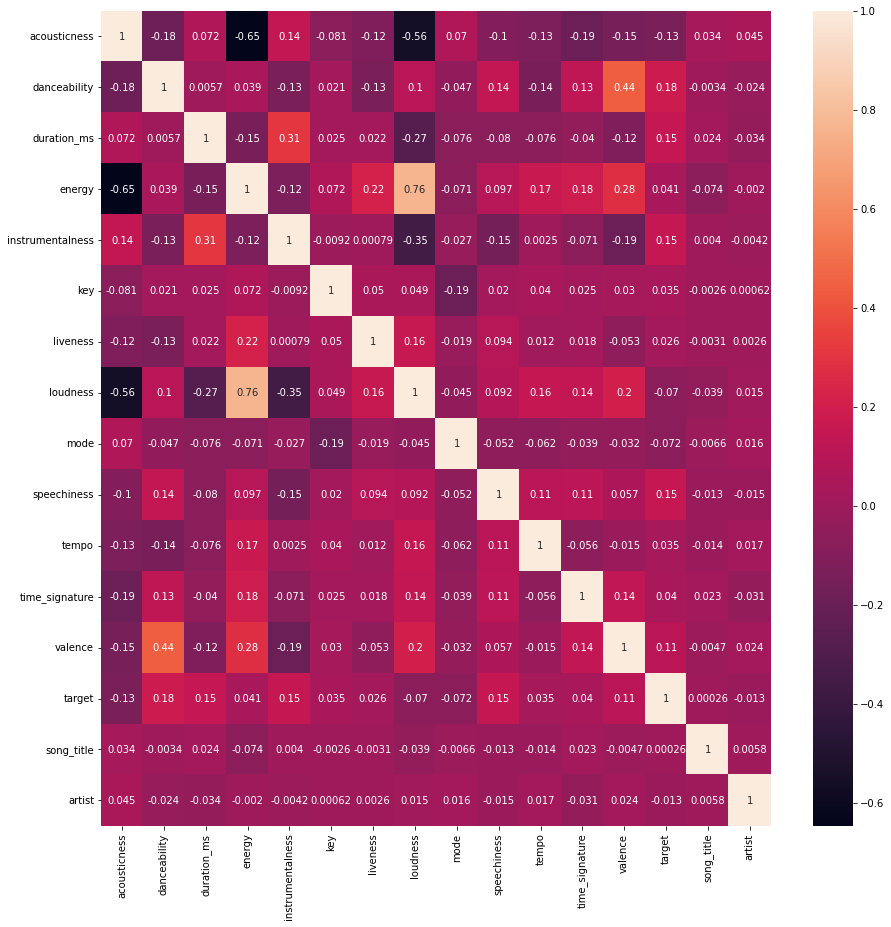

In [ ]:
#Heat Map
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True)

>It can be deduced from the heatmap that there are little correlations between certain features (acousticness/energy and acousticness and loudness) however, when compared against the target variable, the correlation is minimal. This signifies that developing a linear classifiers would not be appropriate for this assignment.

> 



In [ ]:
# check the correlation of the target attribute with all other variables
df.corr()['target'].sort_values(ascending=False)

target              1.000000
danceability        0.177344
speechiness         0.153866
instrumentalness    0.151968
duration_ms         0.146490
valence             0.110064
energy              0.041026
time_signature      0.039927
key                 0.035380
tempo               0.034780
liveness            0.026229
song_title          0.000259
artist             -0.013154
loudness           -0.069935
mode               -0.072453
acousticness       -0.130388
Name: target, dtype: float64

>The heatmap and the correlation above displayed cannot be enough to choose the features for the models, since they have weak correlation. It is important to put them through classifiers to aid in the selection of the features. 

# **3. DATA TRANSFORMATION** 


## **Assigning X and y values (Pre-liminary)**

X -> input variable

y -> target variable

This is determined since for feature selection, we are going to be utlising three classifiers. The X variable, hence, is going to be more streamlined after the feature selection classifiers are going to determine which of the initial input variables have the most correlation against the y variable. 

For now, the X variables are going to be all of the columns EXCEPT for the target variable, and y variable is going to be simply 'target'.


In [ ]:
X = df[['acousticness','danceability','mode','duration_ms','loudness',
                 'energy','instrumentalness','key','liveness', 'speechiness','tempo',
                 'time_signature','valence','song_title','artist']]
X.head()

,acousticness,danceability,mode,duration_ms,loudness,energy,instrumentalness,key,liveness,speechiness,tempo,time_signature,valence,song_title,artist
0,0.0102,0.833,1,204600,-8.795,0.434,0.021900,2,0.1650,0.4310,150.062,4.0,0.286,1043,449
1,0.1990,0.743,1,326933,-10.401,0.359,0.006110,1,0.1370,0.0794,160.083,4.0,0.588,1334,222
2,0.0344,0.838,1,185707,-7.148,0.412,0.000234,2,0.1590,0.2890,75.044,4.0,0.173,1906,449
3,0.6040,0.494,1,199413,-15.236,0.338,0.510000,5,0.0922,0.0261,86.468,4.0,0.230,1044,95
4,0.1800,0.678,0,392893,-11.648,0.561,0.512000,5,0.4390,0.0694,174.004,4.0,0.904,1243,628


In [ ]:
y = df.target

## **Feature Scaling**

Feature Scaling is a way to make numerical data in a dataset have the same range of values ​​(scale). There is no longer one data variable that dominates the other data variables. 

1. https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
2. https://prasetyadi.name/2019/data-preprocessing-menggunakan-modul-python/



In [ ]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler
sc_x = RobustScaler()
X = pd.DataFrame(sc_x.fit_transform(df.drop(["target"],axis = 1),), columns=['acousticness','danceability','mode','duration_ms','loudness','energy','instrumentalness','key','liveness',
                                                                                   'speechiness','tempo','time_signature','valence','song_title','artist'])

X.head()

,acousticness,danceability,mode,duration_ms,loudness,energy,instrumentalness,key,liveness,speechiness,tempo,time_signature,valence,song_title,artist
0,-0.208684,0.901786,-0.348533,-0.997343,0.404752,-0.571429,0.249919,-0.698280,0.0,5.334752,0.763497,0.0,-0.522727,0.066120,-0.319787
1,0.530520,0.500000,1.390337,-1.263065,0.111938,-0.714286,0.068160,-1.138491,0.0,0.347518,1.030501,0.0,0.239899,0.364428,-0.664641
2,-0.113934,0.924107,-0.617083,-1.075288,0.002972,-0.571429,0.210970,-0.246831,0.0,3.320567,-1.235317,0.0,-0.808081,0.950794,-0.319787
3,2.116205,-0.611607,-0.422262,-1.337467,9.456212,-0.142857,-0.222655,-2.463784,0.0,-0.408511,-0.930931,0.0,-0.664141,0.067145,-0.857577
4,0.456129,0.209821,2.327908,-0.547387,9.493301,-0.142857,2.028562,-1.480299,-1.0,0.205674,1.401419,0.0,1.037879,0.271143,-0.047854


## **Data Splitting**

80% -> Training data

20% -> testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  **3. FEATURE IMPORTANCE**



Feature importance aids in reducing the input variables, and aids in understanding both the model and the data better. It can also aid in the betterment of evaluation results. 

Three classifiers were utlised to test which features would be able to produced high accuracy and good evaluation results. The chosen models were ***Random Forest, Decision Tree and Gradient Boosting*** classifiers.

All three of the models are tree-based. Tree-based classifiers calculate the best-performing features near the root of its tree, hence is helpful for feature importance. 

***Links:*** 
1. https://machinelearningmastery.com/calculate-feature-importance-with-python/
2. https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3
3. https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
old shape: (2012, 15)
new shape: (2012, 8)
selected features: ['acousticness' 'danceability' 'mode' 'duration_ms' 'loudness' 'key'
 'speechiness' 'valence']


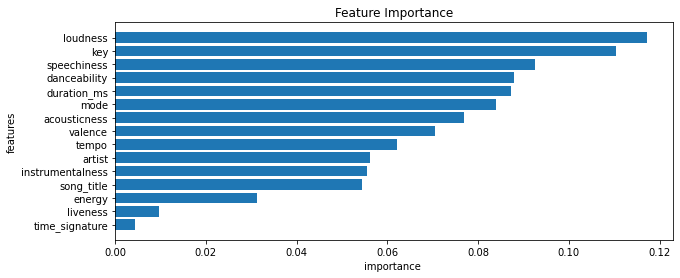

In [ ]:
#RANDOM FOREST
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print(f'{model}') 
selector = SelectFromModel(model)
selector.fit(X, y)

selected_features_randomforest = X.columns[selector.get_support()].values
transformed_X = selector.transform(X)

print(f"old shape: {X.shape}")
print(f"new shape: {transformed_X.shape}")
print(f"selected features:", selected_features_randomforest)

imp_feature = pd \
    .DataFrame({'feature': X.columns, 'importance': model.feature_importances_}) \
    .sort_values(by=['importance'], ascending=True)
plt.figure(figsize=(10,4))
plt.title("Feature Importance")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['feature'], imp_feature['importance'])
plt.show()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
old shape: (2012, 15)
new shape: (2012, 6)
selected features: ['danceability' 'duration_ms' 'loudness' 'key' 'speechiness' 'valence']


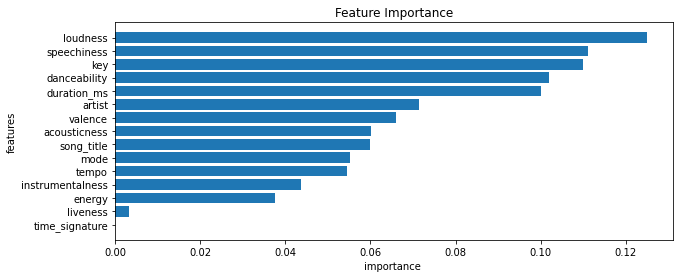

In [ ]:
#DECISION TREE
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print(f'{model}') 
selector = SelectFromModel(model)
selector.fit(X, y)

selected_features_decisiontree = X.columns[selector.get_support()].values
transformed_X = selector.transform(X)

print(f"old shape: {X.shape}")
print(f"new shape: {transformed_X.shape}")
print(f"selected features:", selected_features_decisiontree)

imp_feature = pd \
    .DataFrame({'feature': X.columns, 'importance': model.feature_importances_}) \
    .sort_values(by=['importance'], ascending=True)
plt.figure(figsize=(10,4))
plt.title("Feature Importance")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['feature'], imp_feature['importance'])
plt.show()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
old shape: (2012, 15)
new shape: (2012, 8)
selected features: ['acousticness' 'danceability' 'mode' 'duration_ms' 'loudness' 'key'
 'speechiness' 'valence']


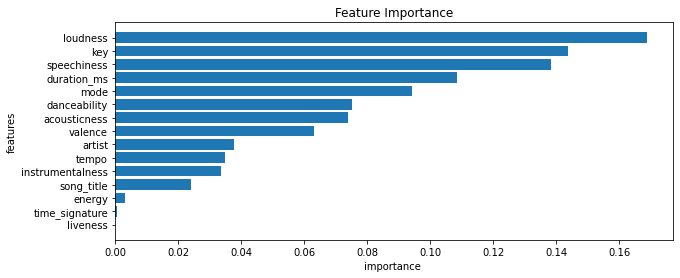

In [ ]:
#GRADIENT BOOSTING
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

print(f'{model}') 
selector = SelectFromModel(model)
selector.fit(X, y)

selected_features_gradientboosting = X.columns[selector.get_support()].values
transformed_X = selector.transform(X)

print(f"old shape: {X.shape}")
print(f"new shape: {transformed_X.shape}")
print(f"selected features:", selected_features_gradientboosting)

imp_feature = pd \
    .DataFrame({'feature': X.columns, 'importance': model.feature_importances_}) \
    .sort_values(by=['importance'], ascending=True)
plt.figure(figsize=(10,4))
plt.title("Feature Importance")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['feature'], imp_feature['importance'])
plt.show()

In [ ]:
#PRINT ALL OF THE FEATURES SELECTED BY THE TREE-BASED CLASSIFIERS
print(f"Decision Tree:", selected_features_decisiontree)
print(f"Random Forest:", selected_features_randomforest)
print(f"Gradient Boosting:", selected_features_gradientboosting)

Decision Tree: ['danceability' 'duration_ms' 'loudness' 'key' 'speechiness' 'valence']
Random Forest: ['acousticness' 'danceability' 'mode' 'duration_ms' 'loudness' 'key'
 'speechiness' 'valence']
Gradient Boosting: ['acousticness' 'danceability' 'mode' 'duration_ms' 'loudness' 'key'
 'speechiness' 'valence']


>**Decision Tree** classifier has *song_title*, and excludes *acousticness* and *duration_ms*

>**Random Forest** and **Gradient Boosting** Classifiers chose the same features.

# **4. MODEL IMPLEMENTATION**



**TOTAL MODELS CHOSEN:** Four Supervised Models for Classification 

The features found previously would be applied to the models selected to finally decide which set of features extracted results in the best accuracy.

##**Logistic Regression**


`What is this model?`

Logistic regression is utlised to classify both linear and non-linear data. It is often utlised with a dataset where the dependant variable/target variable is categorical. This model is claimed to be one of the most popular classification models for binary, and have often contributed to high accuracy rates.

`Justification`

This dataset has a ***binary target variable (target indicating whether the song was liked (1) or disliked (0))***, and after EDA and the nature of the dataset, it can be concluded that this is a classification problem, and since LR is a binary classification model popular in the field, this classifier is implemented ***e.g train the data to see how well the classifier is at classifying from the features selected on whether the song is liked or not.***

***Links:***
1. https://doi.org/10.1109/IRI.2018.00049
2. https://doi.org/10.1109/INCAE.2018.8579372
3. https://doi.org/10.1109/ICASSP.2019.8683376


### **Untuned Classifier Implementation & Evaluation**


There are two sets of features as displayed above. Since it is not clear which one would produce the better results, it is crucial to evaluate the models with both sets of the attributes.

Below, they both are implemented with **no tuning**. 

`lr1_untuned`: LR classifier with GB/RF features. In total of 8 features were inserted. 

`lr2_untuned`: LR classidier with DT features. In total of 6 features were inserted.

As for the evaluation, the metrics chosen were **Accuracy, Precision, Recall, F1-Score, Mean Squared Error and AUC-ROC curve**. 

In [ ]:
#CLASSIFIER IMPLEMENTATION AND DEFAULT HYPERPARAMETERS
lr=LogisticRegression()
lr.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# RF/GB - 8 FEATURES
rfgb=lr.fit(X_train[selected_features_gradientboosting], y_train)
lr1_untuned_pred = rfgb.predict(X_test[selected_features_gradientboosting])

# DT - 6 FEATURES
dt=lr.fit(X_train[selected_features_decisiontree], y_train)
lr2_untuned_pred = dt.predict(X_test[selected_features_decisiontree])

Text(0.5, 0, 'False Positive Rate')

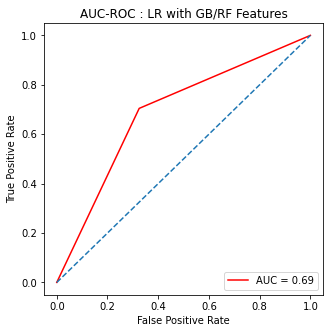

In [ ]:
#AUC-ROC CURVE : RF/GB 
auc_roc=metrics.roc_auc_score(y_test,lr1_untuned_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr1_untuned_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('AUC-ROC : LR with GB/RF Features')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

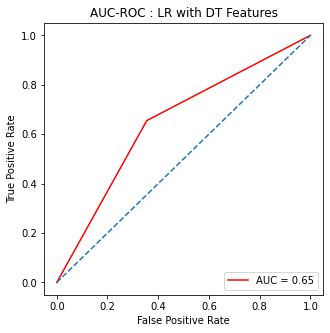

In [ ]:
#AUC-ROC CURVE : DT
auc_roc=metrics.roc_auc_score(y_test,lr2_untuned_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr2_untuned_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('AUC-ROC : LR with DT Features')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
#EVALUATION METRICS -UNTUNED

#RF/GB FEATURES
lr1_untuned_a = accuracy_score(y_test, lr1_untuned_pred)*100
lr1_untuned_p = precision_score(y_test, lr1_untuned_pred)* 100
lr1_untuned_r = recall_score(y_test, lr1_untuned_pred)*100
lr1_untuned_f1 = f1_score(y_test, lr1_untuned_pred)*100
lr1_untuned_mse = mean_squared_error(y_test, lr1_untuned_pred)*100
lr1_untuned_r2 = r2_score(y_test, lr1_untuned_pred)*100

#DT FEATURES
lr2_untuned_a = accuracy_score(y_test, lr2_untuned_pred)*100
lr2_untuned_p = precision_score(y_test, lr2_untuned_pred)* 100
lr2_untuned_r = recall_score(y_test, lr2_untuned_pred)*100
lr2_untuned_f1 = f1_score(y_test, lr2_untuned_pred)*100
lr2_untuned_mse = mean_squared_error(y_test, lr2_untuned_pred)*100
lr2_untuned_r2 = r2_score(y_test, lr2_untuned_pred)*100

#COMPARISON TABLE
untuned={'Accuracy': [round(lr1_untuned_a,1), round(lr2_untuned_a,1)],
                'Precision': [round(lr1_untuned_p,1), round(lr2_untuned_p,1)],
                'Recall': [round(lr1_untuned_r,1), round(lr2_untuned_r,1)],
                'F1-Score': [round(lr1_untuned_f1,1), round(lr2_untuned_f1,1)],
                'MSE': [round(lr1_untuned_mse,1), round(lr2_untuned_mse,1)],
                'R Squared': [round(lr1_untuned_r2,1), round(lr2_untuned_r2,1)],
            }
ulr = pd.DataFrame(untuned, columns = ['Accuracy','Precision','Recall','F1-Score','MSE','R Squared'], 
                   index=['RF/GB Features','DT Features'])
ulr

,Accuracy,Precision,Recall,F1-Score,MSE,R Squared
RF/GB Features,69.0,68.8,70.4,69.6,31.0,-24.1
DT Features,65.0,65.2,65.5,65.4,35.0,-40.0


**Results**:

Upon the evaluation, it can be observed that the features selected by RF/GB classifiers has outperformed compared to the results displayed when DT features wwere implemented. Overall, The accuracy of the better model is 69%, compared to the 65% lower.LR1 has also displayed to produce lower error rate (31) compared to LR2(35), and has shown to have more correlation amongst the features and the target (-24.1) compared to LR1 (-40).

>Despite the improvement to be minor, it can be said that **RF/GB classifiers have produced better results than DT in the base model.** 


### **Tuned Classifier Implementation & Evaluation**

The classifiers will now be tuned in order to finalize which features and final best accuracy can the LR classifier get. Right now, the highest accuracy is 65%, we need to tune the model further to improve this value. 

The path chosen for model tuning and hyperparameter tuning is implementing ***cross validation with GridSearchCV*** and **RandomisedSearchCV**. 

***GridSearchCV*** calculates the accuracy of the model by using many combinations of the parameters, with the use of the cross validation path, and hence aids in discovering the  combination for the selected classifier.

***RandomisedSearchCV*** uses fit and score method, and a sample of the parameters settings are implemented onto the code from the distributions, and not a fixed number. 


***Links:*** 
1. https://medium.com/@kesarimohan87/model-selection-using-cross-validation-and-gridsearchcv-8756aac1e9d7
2. https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

#### **GridSearchCV**

In [ ]:
# TUNING WITH GRIDSEARCHCV

#----HYPERPARAMETER TUNING METRICS----

#RF/GB Features	
params1 = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-10, 10, 50), 
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
             }
#DT Features
params2 = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C':[1, 10, 100], 
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
             }
         
#----ASSIGNING GRID SEARCH----

#RF/GB Features	
grid1 = GridSearchCV(lr, params1)
grid1 = grid1.fit(X_train[selected_features_gradientboosting], y_train)

#DT Features
grid2 = GridSearchCV(lr, params2)
grid2 = grid2.fit(X_train[selected_features_decisiontree], y_train)

#----SETTING THE CLASSIFIER TO THE BEST ORDER OF HYPERPARAMETERS----

#RF/GB Features
lr1_tuned_g = grid1.best_estimator_

#DT Features	
lr2_tuned_g = grid2.best_estimator_

#----TRAIN AND PREDICT----

#RF/GB Features
lr1_tuned_g.fit(X_train[selected_features_gradientboosting], y_train)
lr1_tuned_g_pred = lr1_tuned_g.predict(X_test[selected_features_gradientboosting])

#DT Features	
lr2_tuned_g.fit(X_train[selected_features_decisiontree], y_train)
lr2_tuned_g_pred = lr2_tuned_g.predict(X_test[selected_features_decisiontree])

In [ ]:
#BEST METRICS UTLISED
print('RF/GB Features:')
print('Best Penalty:', grid1.best_estimator_.get_params()['penalty'])
print('Best C:', grid1.best_estimator_.get_params()['C'])
print('Best solver:', grid1.best_estimator_.get_params()['solver'])

print('\nDT Features:')
print('Best Penalty:', grid2.best_estimator_.get_params()['penalty'])
print('Best C:', grid2.best_estimator_.get_params()['C'])
print('Best solver:', grid2.best_estimator_.get_params()['solver'])

RF/GB Features:
Best Penalty: l1
Best C: 0.03727593720314938
Best solver: saga

DT Features:
Best Penalty: l1
Best C: 1
Best solver: saga


Text(0.5, 0, 'False Positive Rate')

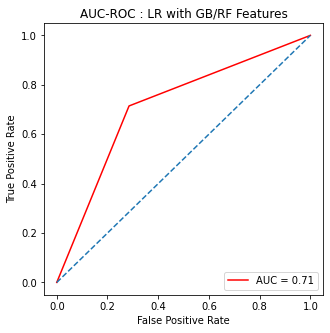

In [ ]:
#GRIDSEACHCV - RB/GB
auc_roc=metrics.roc_auc_score(y_test,lr1_tuned_g_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr1_tuned_g_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('AUC-ROC : LR with GB/RF Features')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

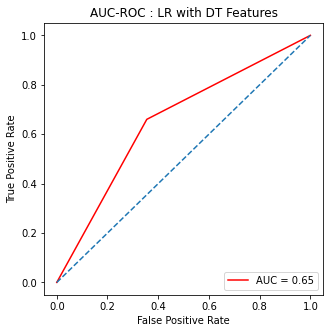

In [ ]:
#GRIDSEACHCV - DT
auc_roc=metrics.roc_auc_score(y_test,lr2_tuned_g_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr2_tuned_g_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('AUC-ROC : LR with DT Features')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
#EVALUATION - GRIDSEARCHCV

#RF/GB FEATURES
a1 = accuracy_score(y_test, lr1_tuned_g_pred) * 100
p1 = precision_score(y_test, lr1_tuned_g_pred)* 100
r1 = recall_score(y_test, lr1_tuned_g_pred)*100
f11 = f1_score(y_test, lr1_tuned_g_pred)*100
mse1 = mean_squared_error(y_test, lr1_tuned_g_pred)*100
r21 = r2_score(y_test, lr1_tuned_g_pred)*100

#DT FEATURES
a2 = accuracy_score(y_test, lr2_tuned_g_pred) * 100
p2 = precision_score(y_test, lr2_tuned_g_pred)* 100
r2 = recall_score(y_test, lr2_tuned_g_pred)*100
f12 = f1_score(y_test, lr2_tuned_g_pred)*100
mse2 = mean_squared_error(y_test, lr2_tuned_g_pred)*100
r22 = r2_score(y_test, lr2_tuned_g_pred)*100

#COMPARISON TABLE
tuned={'Accuracy': [round(a1,1), round(a2,1)],
                'Precision': [round(p1,1), round(p2,1)],
                'Recall': [round(r1,1), round(r2,1)],
                'F1-Score': [round(f11,1), round(f12,1)],
                'MSE': [round(mse1,1), round(mse2,1)],
                'R Squared': [round(r21,1), round(r22,1)],
               }
tlr = pd.DataFrame(tuned, columns = ['Accuracy','Precision','Recall','F1-Score','MSE','R Squared'], 
                   index=['RF/GB Features','DT Features'])
tlr

,Accuracy,Precision,Recall,F1-Score,MSE,R Squared
RF/GB Features,71.5,71.8,71.4,71.6,28.5,-14.2
DT Features,65.3,65.4,66.0,65.7,34.7,-39.0


#### **RandomizedSearchCV**

In [ ]:
#TUNING WITH RANDOMIZEDSEARCHCV

#HYPERPARAMETERS ARE CHOSEN FROM THE PREVIOUS GRIDSEARCHCV- UNCHANGED

#----ASSIGNING RANDOMIZEDSEARCHCV----
#RF/GB FEATURES
random1 = RandomizedSearchCV(lr, params1)
random1 = random1.fit(X_train[selected_features_gradientboosting], y_train)

random2 = RandomizedSearchCV(lr, params2)
random2 = random2.fit(X_train[selected_features_decisiontree], y_train)

#----SETTING THE CLASSIFIER TO THE BEST ORDER OF HYPERPARAMETERS----
#RF/GB FEATURES
lr1_tuned_r = random1.best_estimator_
lr2_tuned_r = random2.best_estimator_

#----TRAIN AND PREDICT----
#RF/GB FEATURES
lr1_tuned_r.fit(X_train[selected_features_gradientboosting], y_train)
lr1_tuned_r_pred = lr1_tuned_r.predict(X_test[selected_features_gradientboosting])

lr2_tuned_r.fit(X_train[selected_features_decisiontree], y_train)
lr2_tuned_r_pred = lr2_tuned_r.predict(X_test[selected_features_decisiontree])

In [ ]:
#BEST METRICS UTLISED
print('RF/GB Features:')
print('Best Penalty:', random1.best_estimator_.get_params()['penalty'])
print('Best C:', random1.best_estimator_.get_params()['C'])
print('Best solver:', random1.best_estimator_.get_params()['solver'])

print('\nDT Features:')
print('Best Penalty:', random2.best_estimator_.get_params()['penalty'])
print('Best C:', random2.best_estimator_.get_params()['C'])
print('Best solver:', random2.best_estimator_.get_params()['solver'])

RF/GB Features:
Best Penalty: l2
Best C: 0.2442053094548655
Best solver: lbfgs

DT Features:
Best Penalty: l1
Best C: 1
Best solver: saga


Text(0.5, 0, 'False Positive Rate')

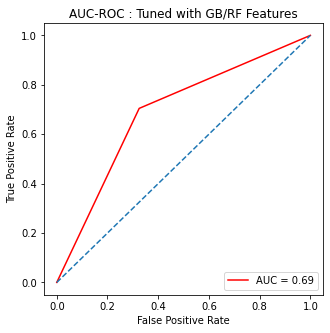

In [ ]:
#RANDOMIZEDSEARCHCV - RB/GB
auc_roc=metrics.roc_auc_score(y_test,lr1_tuned_r_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr1_tuned_r_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('AUC-ROC : Tuned with GB/RF Features')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

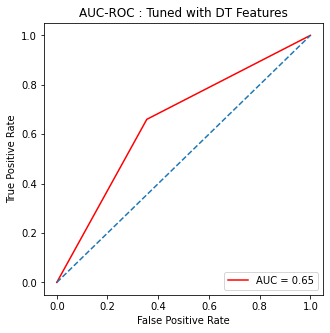

In [ ]:
#RANDOMIZEDSEARCHCV - DT
auc_roc=metrics.roc_auc_score(y_test,lr2_tuned_g_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr2_tuned_g_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('AUC-ROC : Tuned with DT Features')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
#EVALUATION - RANDOMIZEDSEARCHCV

#RF/GB FEATURES
a1r = accuracy_score(y_test, lr1_tuned_r_pred) * 100
p1r = precision_score(y_test, lr1_tuned_r_pred)* 100
r1r = recall_score(y_test, lr1_tuned_r_pred)*100
f11r = f1_score(y_test, lr1_tuned_r_pred)*100
mse1r = mean_squared_error(y_test, lr1_tuned_r_pred)*100
r21r = r2_score(y_test, lr1_tuned_r_pred)*100

#DT FEATURES
a2r = accuracy_score(y_test, lr2_tuned_r_pred) * 100
p2r = precision_score(y_test, lr2_tuned_r_pred)* 100
r2r = recall_score(y_test, lr2_tuned_r_pred)*100
f12r = f1_score(y_test, lr2_tuned_r_pred)*100
mse2r = mean_squared_error(y_test, lr2_tuned_r_pred)*100
r22r = r2_score(y_test, lr2_tuned_r_pred)*100

#COMPARISON TABLE
tuned={'Accuracy': [round(a1r,1), round(a2r,1)],
                'Precision': [round(p1r,1), round(p2r,1)],
                'Recall': [round(r1r,1), round(r2r,1)],
                'F1-Score': [round(f11r,1), round(f12r,1)],
                'MSE': [round(mse1r,1), round(mse2r,1)],
                'R Squared': [round(r21r,1), round(r22r,1)],
               }
tlr = pd.DataFrame(tuned, columns = ['Accuracy','Precision','Recall','F1-Score','MSE','R Squared'], 
                   index=['RF/GB Features','DT Features'])
tlr

,Accuracy,Precision,Recall,F1-Score,MSE,R Squared
RF/GB Features,69.0,68.8,70.4,69.6,31.0,-24.1
DT Features,65.3,65.4,66.0,65.7,34.7,-39.0


### **Summary of Results and Conclusion**

In [ ]:
#SUMMARY OF RF/GB FEATURES WITHIN LOGISTIC REGRESSION

#IMPROVEMENT -RF/GB
d_a1 = a1 - lr1_untuned_a
d_p1 = p1 -lr1_untuned_p
d_r1 = r1 - lr1_untuned_r
d_f11 = f11 - lr1_untuned_f1
d_mse1 = mse1 - lr1_untuned_mse
d_r21 = r21 - lr1_untuned_r2


d_a1r = a1r - lr1_untuned_a
d_p1r = p1r -lr1_untuned_p
d_r1r = r1r - lr1_untuned_r
d_f11r = f11r - lr1_untuned_f1
d_mse1r = mse1r - lr1_untuned_mse
d_r21r = r21r - lr1_untuned_r2


print("RF/GB FEATURES")
lrtuned={'Accuracy': [round(lr1_untuned_a,1), round(a1,1), round(a1r,1), round(d_a1,1), round(d_a1r,1)],
                'Precision': [round(lr1_untuned_p,1), round(p1,1), round(p1r,1), round(d_p1,1), round(d_p1r,1)],
                'Recall': [round(lr1_untuned_r,1), round(r1,1), round(r1r,1), round(d_r1,1), round(d_r1r,1)],
                'F1-Score': [round(lr1_untuned_f1,1), round(f11,1), round(f11r,1), round(d_f11,1), round(d_f11r,1)],
                'MSE': [round(lr1_untuned_mse,1), round(mse1,1), round(mse1r,1), round(d_mse1,1), round(d_mse1r,1)],
                'R Squared': [round(lr1_untuned_r2,1), round(r21,1), round(r21r,1), round(d_r21,1), round(d_r21r,1)]
               }
tlr = pd.DataFrame(lrtuned, columns = ['Accuracy','Precision','Recall','F1-Score','MSE','R Squared'], 
                   index=['Untuned','Tuned - GridSearchCV','Tuned - RandomizedSearchCV', '% improved (Grid)','% improved (Random)'])
tlr

RF/GB FEATURES


,Accuracy,Precision,Recall,F1-Score,MSE,R Squared
Untuned,69.0,68.8,70.4,69.6,31.0,-24.1
Tuned - GridSearchCV,71.5,71.8,71.4,71.6,28.5,-14.2
Tuned - RandomizedSearchCV,69.0,68.8,70.4,69.6,31.0,-24.1
% improved (Grid),2.5,3.0,1.0,2.0,-2.5,9.9
% improved (Random),0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#SUMMARY OF DT FEATURES WITHIN LOGISTIC REGRESSION

#IMPROVEMENT

d_a2 = a2 - lr2_untuned_a
d_p2 = p2 -lr2_untuned_p
d_r2 = r2 - lr2_untuned_r
d_f12 = f12 - lr2_untuned_f1
d_mse2 = mse2 - lr2_untuned_mse
d_r22 = r22 - lr2_untuned_r2


d_a2r = a2r - lr2_untuned_a
d_p2r = p2r -lr2_untuned_p
d_r2r = r2r - lr2_untuned_r
d_f12r = f12r - lr2_untuned_f1
d_mse2r = mse2r - lr2_untuned_mse
d_r22r = r22r - lr2_untuned_r2

print("DT FEATURES")
lrtuned={'Accuracy': [round(lr2_untuned_a,1), round(a2,1), round(a2r,1), round(d_a2,1), round(d_a2r,1)],
                'Precision': [round(lr2_untuned_p,1), round(p2,1), round(p2r,1), round(d_p2,1), round(d_p2r,1)],
                'Recall': [round(lr2_untuned_r,1), round(r2,1), round(r2r,1), round(d_r2,1), round(d_r2r,1)],
                'F1-Score': [round(lr2_untuned_f1,1), round(f12,1), round(f12r,1), round(d_f12,1), round(d_f12r,1)],
                'MSE': [round(lr2_untuned_mse,1), round(mse2,1), round(mse2r,1), round(d_mse2,1), round(d_mse2r,1)],
                'R Squared': [round(lr2_untuned_r2,1), round(r22,1), round(r22r,1), round(d_r22,1), round(d_r22r,1)]
               }
tlr = pd.DataFrame(lrtuned, columns = ['Accuracy','Precision','Recall','F1-Score','MSE','R Squared'], 
                   index=['Untuned','Tuned - GridSearchCV','Tuned - RandomizedSearchCV', '% improved (Grid)','% improved (Random)'])
tlr

DT FEATURES


,Accuracy,Precision,Recall,F1-Score,MSE,R Squared
Untuned,65.0,65.2,65.5,65.4,35.0,-40.0
Tuned - GridSearchCV,65.3,65.4,66.0,65.7,34.7,-39.0
Tuned - RandomizedSearchCV,65.0,65.2,65.5,65.4,35.0,-40.0
% improved (Grid),0.2,0.2,0.5,0.3,-0.2,1.0
% improved (Random),0.0,0.0,0.0,0.0,0.0,0.0


**Results:**

Overall, both RandomizedSearchCV and GridSearchCV has produced improved results compared to the base model. Out of the optimisers, GridSearchCV has perfomed better, which can be said to be due to the fact that it searches for all the best combinations compared to RandomisedSearchCV where only a random combination is selected each time. 

Out of them, the feature selection performed best is RF/DF features (8 features), where it has improved 2.5% in accuracy. This feature group has also outperformed in terms of Random search, and overall has outperformed in base model, and both of the optimisers.

>**Best model overall -> Logistic Regession with 8 Features (RF/GB) with GridSearchCV (71.5% acc)**